In [ ]:
import gpiod
DT_PIN = 27
SCK_PIN = 17
# LED_PIN = 17
# BUTTON_PIN = 27
chip = gpiod.Chip('gpiochip4')
dt_line = chip.get_line(DT_PIN)
sck_line = chip.get_line(SCK_PIN)
led_line.request(consumer="LED", type=gpiod.LINE_REQ_DIR_OUT)
button_line.request(consumer="Button", type=gpiod.LINE_REQ_DIR_IN)
try:
   while True:
       button_state = button_line.get_value()
       if button_state == 1:
           led_line.set_value(1)
       else:
           led_line.set_value(0)
finally:
   led_line.release()
button_line.release()

In [6]:
import gpiozero

DT_PIN = 27
SCK_PIN = 17
i=0
Count=0
#dt = gpiozero.OutputDevice(DT_PIN)
sck = gpiozero.OutputDevice(SCK_PIN)
#dt.on()
#dt.close()
sck.off()
dt = gpiozero.InputDevice(DT_PIN)
while dt.value == 1:
    i=0
for i in range(24):
    sck.on()
    Count=Count<<1
    sck.off()
    #time.sleep(0.001)
    if dt.value == 0: 
        Count=Count+1
    sck.on()
    Count=Count^0x800000
    #time.sleep(0.001)
    sck.off()


GPIOPinInUse: pin GPIO17 is already in use by <gpiozero.OutputDevice object on pin GPIO17, active_high=True, is_active=False>

In [ ]:
from gpiozero import Motor

motor1 = Motor(14, 15, 18, 23)
motor2 = Motor(12, 16, 20, 21)
motor1.forward(0.25)
motor2.forward(0.25)
motor1.stop()
motor2.stop()

<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\c'
C:\Users\BubsBuilds\AppData\Local\Temp\ipykernel_7448\4194933029.py:5: SyntaxWarning: invalid escape sequence '\c'
  filename = 'B:\codeRepo\MechTester\MechTester\_test\TestResult_1708664352.csv'


1708664334.731 15.792
1708664334.932 15.788
1708664335.132 15.776
1708664335.333 15.76
1708664335.533 15.754
1708664335.733 15.766
1708664335.934 15.756
1708664336.134 15.656
1708664336.335 15.686
1708664336.535 15.698
1708664336.735 15.65
1708664336.936 15.644
1708664337.136 15.58
1708664337.336 15.478
1708664337.537 15.482
1708664337.737 15.43
1708664337.937 15.37
1708664338.138 15.348
1708664338.338 14.214
1708664338.538 -34.35
1708664338.739 -93.452
1708664338.939 -1087.368
1708664339.139 -1813.258
1708664339.34 -1798.418
1708664339.54 -1794.47
1708664339.741 -1791.472
1708664339.941 -1788.726
1708664340.142 -1786.288
1708664340.342 -1783.8
1708664340.543 -1782.892
1708664340.743 -1782.086
1708664340.944 -1781.414
1708664341.144 -1780.542
1708664341.345 -1779.978
1708664341.545 -1779.522
1708664341.746 -1779.162
1708664341.946 -1778.766
1708664342.146 -1778.268
1708664342.347 -1777.964
1708664342.547 -1777.64
1708664342.747 -1777.352
1708664342.948 -1777.072
1708664343.148 -1776.71

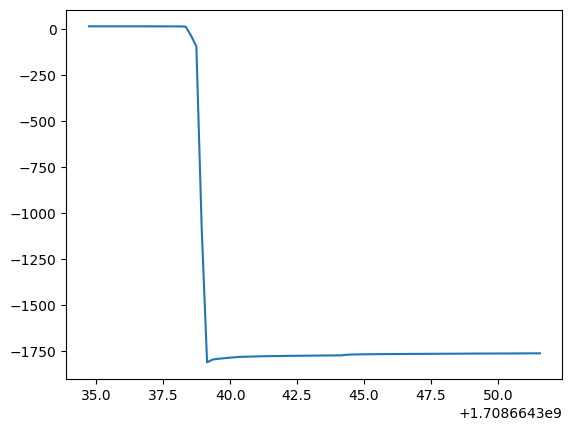

In [18]:
import csv
import time
from matplotlib import pyplot as plt

filename = 'B:\codeRepo\MechTester\MechTester\_test\TestResult_1708664352.csv'
loads = []
times = []
with open(filename) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        curTime = round(float(row[0]), 3)
        curLoad = round(float(row[1]), 3)*2
        times.append(curTime)
        loads.append(curLoad)
        print(curTime,curLoad)
        
plt.plot(times, loads)
plt.show()

[[1709265336.839, 17.833], [1709265337.124, 17.813], [1709265337.379, 17.82], [1709265337.64, 17.848], [1709265337.899, 17.822], [1709265338.155, 17.82], [1709265338.415, 17.824], [1709265338.672, 17.865], [1709265338.93, 17.834], [1709265339.198, 17.827], [1709265339.456, 17.85], [1709265339.762, 17.829], [1709265340.071, 17.808], [1709265340.329, 17.808], [1709265340.589, 17.815], [1709265340.848, 17.826], [1709265341.105, 17.849], [1709265341.364, 17.812], [1709265341.618, 17.819], [1709265341.879, 17.827], [1709265342.137, 17.806], [1709265342.391, 17.846], [1709265342.646, 17.86], [1709265342.909, 17.86], [1709265343.167, 17.824], [1709265343.43, 17.846], [1709265343.688, 17.864], [1709265343.946, 17.846], [1709265344.214, 17.869], [1709265344.471, 17.825], [1709265344.729, 17.866], [1709265344.987, 17.841], [1709265345.247, 17.865], [1709265345.505, 17.813], [1709265345.763, 17.841], [1709265346.02, 17.853], [1709265346.281, 17.85], [1709265346.538, 17.831], [1709265346.792, 17.8

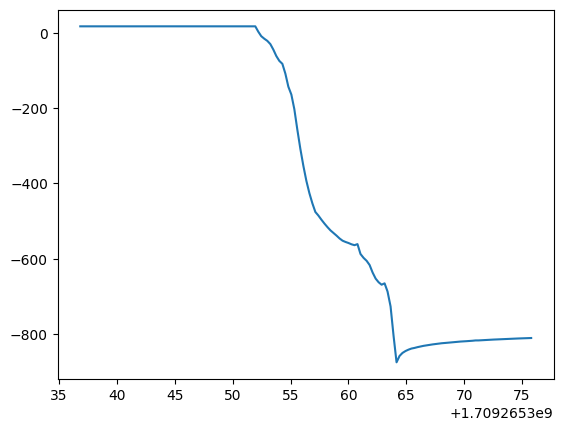

In [8]:
import pymongo
from matplotlib import pyplot as plt 

client = pymongo.MongoClient("JFS-MAIN", 27017)
db = client['mt']
coll = db['test_data']
test_rec = coll.find_one(sort=[('time', pymongo.DESCENDING)])
# for rec in test_rec:
#     print(rec)
#     #test_rec = rec['lcDat']
print(test_rec['lcDat'])
times = []
vals = []
for row in test_rec['lcDat']:
    times.append(row[0])
    vals.append(row[1])
plt.plot(times, vals)
